## 一項式迴歸

In [91]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv', index_col=0)

In [92]:
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


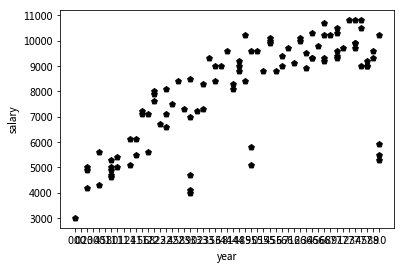

In [93]:
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values
plt.scatter(X, Y, color='black', marker='p')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()

Populating the interactive namespace from numpy and matplotlib


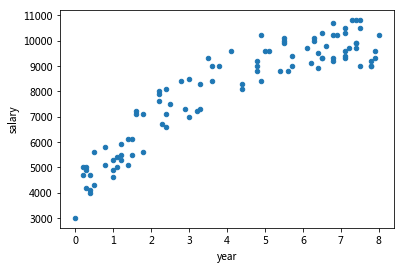

In [94]:
%pylab inline
df.plot(kind = 'scatter',x = 'year', y= 'salary')

In [95]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
print('Coefficient: ', regr.coef_)

Coefficient:  [ 712.59413615]


In [97]:
print('Intercept: ', regr.intercept_)

Intercept:  5049.00989981


In [98]:
regr.predict(17)

array([ 17163.11021428])

In [99]:
employee = numpy.array([[5],[17],[13]])

In [100]:
import numpy
regr.predict(employee)

array([  8611.98058054,  17163.11021428,  14312.7336697 ])

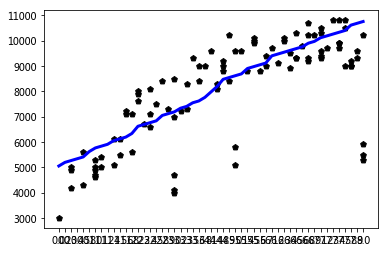

In [103]:
from matplotlib import pyplot as plt
X2 = X.sort_values('year')
plt.scatter(X, Y, color='black',marker='p')
plt.plot(X2, regr.predict(X2), color= "blue", linewidth = 3)
plt.show()

## 二項式迴歸

In [104]:
from sklearn.preprocessing import PolynomialFeatures
poly_regr = PolynomialFeatures(degree = 2)
X_ = poly_regr.fit_transform(X)

In [105]:
regr = LinearRegression()
regr.fit(X_,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
employee = numpy.array([[5],[17],[13]])

In [107]:
X2 = poly_regr.fit_transform(employee)
regr.predict(X2)

array([ 9310.23228321, -2117.40898333,  5522.37363673])

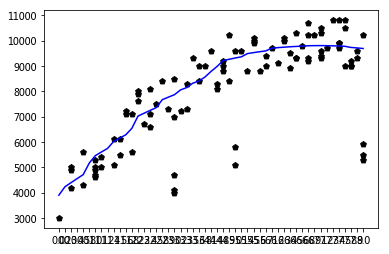

In [108]:
from matplotlib import pyplot as plt
X2 = X.sort_values(['year'])
X2_ =  poly_regr.fit_transform(X2)

plt.scatter(X, Y, color='black',marker='p')
plt.plot(X2, regr.predict(X2_), color= "blue")
plt.show()

## 三項式迴歸

In [109]:
from sklearn.preprocessing import PolynomialFeatures
poly_regr = PolynomialFeatures(degree = 3)
X_ = poly_regr.fit_transform(X)

In [110]:
regr = LinearRegression()
regr.fit(X_,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
from matplotlib import pyplot as plt
X3  = X.sort_values(['year'])
X3_ =  poly_regr.fit_transform(X3)

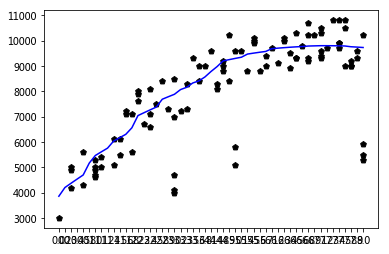

In [112]:
plt.scatter(X, Y, color='black',marker='p')
plt.plot(X3, regr.predict(X3_), color= "blue")
plt.show()

In [89]:
employee = numpy.array([[5],[17],[13]])
X3 = poly_regr.fit_transform(employee)
regr.predict(X3)

array([ 9294.79869615,  1407.9936877 ,  6608.44487232])